CellChat inference and analysis of spatially proximal cell-cell communication from spatially resolved transcriptomics (multiple datasets)

In [3]:
ptm = Sys.time()

library(CellChat)
library(Seurat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject



In [17]:
results_folder ='/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/nas-data/fmlab/group_folders/lythgo02/OV_visium/emily/cell2location/cellTrek/cellchat'

In [29]:
#cellTrekObs <- readRDS(paste0(ov_visium, "ov_cellTrek_obj.rds"))
#cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/'
#adata_vis_match <- zellkonverter::readH5AD(file.path(cell2loc, "final_adata_vis_match.h5ad"))

cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/nas-data/fmlab/group_folders/lythgo02/OV_visium/emily/cell2location/'
#ovTrainAll <- readRDS(paste0(cell2loc, "cellTrek/celltrek_results_ntree1000_p500_celltrek.rds"))
ovCellTrekList <- readRDS(paste0(cell2loc, "cellTrek/celltrek_results_updated.rds"))

For one sample at a time

In [ ]:
ovCellTrek <- adata_vis_match[[1]]
# 1. Extract expression and meta
data.input <- GetAssayData(ovCellTrek, slot = "data")  # or "counts"
meta <- ovCellTrek@meta.data
# 2. Create CellChat object
cellchat <- CellChat::createCellChat(object = data.input, meta = meta, group.by = "cell_type")
CellChatDB <- CellChatDB.mouse  # or .human
cellchat@DB <- CellChatDB
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
# all predicted interactions (data.frame)
comm <- subsetCommunication(cellchat)
head(comm)
# save
write.csv(comm, file = file.path(results_folder, "ov1_cellchat_all_interactions.csv"), row.names = FALSE)
# list pathways and group sizes
signaling_paths <- names(cellchat@netP)
print(signaling_paths)
groupSize <- as.numeric(table(cellchat@idents))
groupSize


For all in a loop

In [31]:

cellchat_list <- list()

for (i in seq_along(ovCellTrekList)) {
  
  sample_name <- if (!is.null(names(ovCellTrekList)) && names(ovCellTrekList)[i] != "") {
    names(ovCellTrekList)[i]
  } else {
    paste0("sample_", i)
  }
  message("Creating CellChat object for ", sample_name)
  
  ovCellTrek <- ovCellTrekList[[i]]
  
  # 1. Extract expression & metadata
  data.input <- GetAssayData(ovCellTrek, slot = "data")
  meta <- ovCellTrek@meta.data
  
  # Ensure you have a grouping column (rename if needed)
  # e.g. your column might be "cell_type_collapsed"
  if (!"cell_type" %in% colnames(meta) && "cell_type_collapsed" %in% colnames(meta)) {
    meta$cell_type <- meta$cell_type_collapsed
  }
  
  # 2. Create CellChat object
  cellchat <- CellChat::createCellChat(
    object = data.input,
    meta = meta,
    group.by = "cell_type"
  )
  
  cellchat_list[[sample_name]] <- cellchat
}

# --- Optional: preview what was created ---
cellchat_list


Creating CellChat object for OV_1



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Cycling Plasma Cells, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


Creating CellChat object for OV_2



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Cycling Plasma Cells, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


Creating CellChat object for OV_3



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


Creating CellChat object for OV_4



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Cycling Plasma Cells, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


Creating CellChat object for OV_5



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


Creating CellChat object for OV_6



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Cycling Plasma Cells, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, Th1, Th17, Treg, Tumour 


$OV_1
An object of class CellChat created from a single dataset 
 14542 genes.
 9276 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_2
An object of class CellChat created from a single dataset 
 14542 genes.
 13696 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_3
An object of class CellChat created from a single dataset 
 14542 genes.
 10291 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_4
An object of class CellChat created from a single dataset 
 14542 genes.
 5964 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_5
An object of class CellChat created from a single dataset 
 14542 genes.
 9080 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_6
An object of class CellChat created from a single dataset 
 14542 genes.
 5391 cells. 
CellChat analysis of single cell RNA-seq data! 


In [32]:
# Load mouse ligand-receptor database
CellChatDB <- CellChatDB.mouse
for (i in names(cellchat_list)) {
  cellchat_list[[i]]@DB <- CellChatDB
  cellchat_list[[i]] <- subsetData(cellchat_list[[i]])           # subset relevant genes
  cellchat_list[[i]] <- identifyOverExpressedGenes(cellchat_list[[i]])
  cellchat_list[[i]] <- identifyOverExpressedInteractions(cellchat_list[[i]])
  cellchat_list[[i]] <- computeCommunProb(cellchat_list[[i]])
  cellchat_list[[i]] <- computeCommunProbPathway(cellchat_list[[i]])
  cellchat_list[[i]] <- aggregateNet(cellchat_list[[i]])
}


The number of highly variable ligand-receptor pairs used for signaling inference is 1255 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-10-27 16:47:57.542365]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-10-27 16:52:59.831249]"
The number of highly variable ligand-receptor pairs used for signaling inference is 1286 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-10-27 16:53:05.010571]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-10-27 16:58:42.816095]"
The number of highly variable ligand-receptor pairs used for signaling inference is 1256 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-10-27 16:58:47.366644]"
[1] ">>> C

In [34]:

comm_list=list()

for (sample_name in names(cellchat_list)) {
  cellchat <- cellchat_list[[sample_name]]
  
  # Extract all significant interactions
  comm <- subsetCommunication(cellchat)
  
  # Save to CSV
  write.csv(
    comm,
    file = file.path(results_folder, paste0(sample_name, "_cellchat_all_interactions.csv")),
    row.names = FALSE
  )
  
  # Store in a list for later combination
  comm_list[[sample_name]] <- comm
}

# --- Optional: combine all into one dataframe ---
comm_all <- bind_rows(comm_list, .id = "sample")

# Quick preview
head(comm_all)

,sample,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,OV_1,B naive activated,B naive activated,Tgfb1,TGFbR1_R2,0.02177701,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
2,OV_1,B naive resting,B naive activated,Tgfb1,TGFbR1_R2,0.02292956,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
3,OV_1,CD4,B naive activated,Tgfb1,TGFbR1_R2,0.01804501,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
4,OV_1,CD8,B naive activated,Tgfb1,TGFbR1_R2,0.02235130,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
5,OV_1,Dendritic Cells,B naive activated,Tgfb1,TGFbR1_R2,0.01184832,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
6,OV_1,Endothelial,B naive activated,Tgfb1,TGFbR1_R2,0.01188053,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350


In [ ]:
# ...existing code...

# pick a CellChat/Seurat object that has expression + metadata + coords
cc_obj <- if (exists("cellchat")) cellchat else if (exists("cellchat_list")) cellchat_list[[1]] else stop("no cellchat object found")
expr_mat <- as.matrix(cc_obj@data)            # genes x cells
meta_df   <- cc_obj@meta                       # metadata; rows = cell names

# detect coordinate columns
coords_cols <- intersect(c("coord_x","coord_y","x","y"), colnames(meta_df))
if (length(coords_cols) < 2) stop("no coord columns found in metadata (coord_x/coord_y or x/y)")

# helper to highlight tumour and CD8 cells
is_tumour <- function(x) grepl("Tumou?r|Tumor|Cancer", x, ignore.case = TRUE)
is_cd8    <- function(x) grepl("CD8", x, ignore.case = TRUE)

meta_df <- meta_df %>%
  mutate(cell_type_label = if ("cell_type" %in% colnames(meta_df)) as.character(cell_type) else as.character(ident),
         is_tumour = is_tumour(cell_type_label),
         is_cd8   = is_cd8(cell_type_label))

# spatial plot for one gene (inline + save)
plot_spatial_gene_pair <- function(gene, prefix = "spatial", save_to = NULL) {
  if (! gene %in% rownames(expr_mat)) {
    message("gene not found: ", gene); return(NULL)
  }
  tmp <- meta_df
  tmp$expr <- as.numeric(expr_mat[gene, rownames(tmp)])
  # expression heatmap
  p_expr <- ggplot(tmp, aes_string(x = coords_cols[1], y = coords_cols[2], color = "expr")) +
    geom_point(size = 0.7) + scale_color_viridis_c(option = "viridis") +
    coord_fixed() + ggtitle(paste0(gene, " expression")) + theme_minimal() +
    theme(axis.title = element_blank())
  # highlight tumour vs CD8
  tmp$label <- case_when(tmp$is_tumour ~ "Tumour",
                         tmp$is_cd8   ~ "CD8",
                         TRUE          ~ "Other")
  p_label <- ggplot(tmp, aes_string(x = coords_cols[1], y = coords_cols[2])) +
    geom_point(aes(color = label), size = 0.7) +
    scale_color_manual(values = c("Tumour" = "red", "CD8" = "blue", "Other" = "grey70")) +
    coord_fixed() + ggtitle("Tumour / CD8 locations") + theme_minimal() +
    theme(axis.title = element_blank(), legend.position = "right")
  combo <- p_expr + p_label + plot_layout(ncol = 2, widths = c(1,0.8))
  if (!is.null(save_to)) ggsave(filename = save_to, plot = combo, width = 10, height = 5, dpi = 150)
  return(combo)
}

# genes of interest (from your interaction list)
genes <- c("Pvr","Cd226","Raet1e","Ulbp1","Nectin2","Cd8a","Cd8b1","H2-D1","Cxcl16","Cxcr6","Clec2d","Klrb1b","Klrk1","Hcst")

# quick check which are present
present <- genes[genes %in% rownames(expr_mat)]
missing <- setdiff(genes, present)
message("present: ", paste(present, collapse = ", "))
if (length(missing)) message("missing (not found in expr): ", paste(missing, collapse = ", "))

# plot and save each (files saved to results_folder)
for (g in present) {
  out_file <- file.path(results_folder, paste0("spatial_", g, ".png"))
  p <- plot_spatial_gene_pair(g, save_to = out_file)
  print(p)   # show inline in notebook
}

Loading required package: viridisLite



agg_record_559351520 
                   2

agg_record_559351520 
                   2

gene not found:ITGA4_ITGB1

gene not found:ITGAV_ITGB1



previous attempts below

In [ ]:
adata_vis_match[[1]]@assays$RNA@data[1:5,1:5]

In [ ]:
distMats <- lapply(cellTrekObs, function(ctOb){
    obCoord <- as.matrix(ctOb@meta.data[,c("coord_x", "coord_y")])
    obDist <- CellChat::computeRegionDistance(obCoord,
                                              meta = ctOb@meta.data,
                                              contact.knn.k=10)
    return(obDist)
})

The above is seeing if it will work if I load Ollie's version unprocessed, still no result

In [ ]:
#local
cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'
ov_visium = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'

#### Load Visium Data
ovVis <- readRDS(paste0(ov_visium, "celltrek_results.rds"))  #version of Ollie's filtered against mine

#### Load scRNA-seq
ovSc <- readRDS("/home/lythgo02/Documents/OV_visium/upk10_sc_400_newlyAnnot.rds")

In [ ]:
#convert updated annotation to factor with levels organised in alphabetical order for plotting purposes 
ovVis <- lapply(ovVis, function(i){
    i$cell_type <- ifelse(grepl("Tumour", i$updated_annotation), "Tumour",  #collapse tumour 1,2,3 subgroups into one 
                                    i$updated_annotation)  
    i$cell_type <- factor(i$cell_type,
                                    levels=sort(unique(i$cell_type)))                                                        
    return(i)
})

In [ ]:

ovVis <- lapply(ovVis, function(ovCellTrek) {
    cell_type <- as.character(ovCellTrek@meta.data$cell_type)

    #merge categories with consistently low counts across samples
    cell_type[grepl("Th", cell_type)] <- "T-helper"
    cell_type[grepl("Cycling", cell_type)] <- "Plasma Cells"
    # Add to metadata
    ovCellTrek@meta.data$cell_type_collapsed <- factor(cell_type)

    return(ovCellTrek)
})

In [ ]:
ov1 <- ovVis[[1]]
colnames(ov1@meta.data)
unique(ov1@meta.data$cell_type) #from celltrek
summary(ov1@meta.data$coord_x) #dimensions in pixels so will need converting 
ov1@images$slice1@scale.factors
ov1@images$slice1@spot.radius
slotNames(ov1[["RNA"]])


[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_originalexp"              
 [5] "nFeature_originalexp"             "percentMt"                       
 [7] "nCount_SCT"                       "nFeature_SCT"                    
 [9] "SCT_snn_res.1"                    "seurat_clusters"                 
[11] "pANN_0.25_0.19_161"               "DF.classifications_0.25_0.19_161"
[13] "doublet_classification"           "CellAssign"                      
[15] "Treatment"                        "Cell_Type"                       
[17] "newAnnot"                         "newAnnot_1"                      
[19] "inferCNV_Score"                   "inferCNV_Class"                  
[21] "Final_Annotation"                 "CopyKat"                         
[23] "newAnnot_2"                       "pANN_0.25_0.05_197"              
[25] "DF.classifications_0.25_0.05_197" "pANN_0.25_0.19_227"              
[27] "DF.classifications_0.25_0.19_227" "pANN_0.25_0.06_117"              
[29] "DF.classifications_0.25_0.06_117" "pANN_0.25_0.28_314"              
[31] "DF.classifications_0.25_0.28_314" "SCT_snn_res.0.5"                 
[33] "ident"                            "updated_annotation"              
[35] "X_indices"                        "X_scvi_batch"                    
[37] "X_scvi_labels"                    "id_raw"                          
[39] "id_new"                           "coord_x"                         
[41] "coord_y"                          "cell_type"                       
[43] "cell_type_collapsed"

[1] Tumour               Macrophage           Monocytes           
 [4] Th17                 CD4                  CD8                 
 [7] Mesenchymal          Dendritic Cells      Plasma Cells        
[10] B naive activated    NK_cell              Endothelial         
[13] Treg                 Cycling Plasma Cells B naive resting     
[16] Th1                  Neutrophils         
17 Levels: B naive activated B naive resting CD4 CD8 ... Tumour

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8682   11999   14394   14429   16742   20581 

$spot
[1] 0.06443299

$fiducial
[1] 415.707

$hires
[1] 0.06443299

$lowres
[1] 0.0193299

$spot_dis
[1] 397

$spot_dis_intp
[1] 396.0051

attr(,"class")
[1] "scalefactors"

[1] 0.01339262

[1] "counts"        "data"          "scale.data"    "key"          
[5] "assay.orig"    "var.features"  "meta.features" "misc"

Cellchat requires normalised data
 - Ollie appears to have previously used SCTransform which is from the same authors as Cellchat (Seurat lot)
 - In their workflow they appear to use SCT data but this is the residuals after regression (like Z-scaled), given they say to use log normalised data, not scaled, will use NormaliseData function 
 - I am using the output from celltrek as input for cellchat so the normalised data is in obj[["RNA]]@data

Prepare inputs
CHECK CONVERSION OF PIXEL TO UM - CHCK THE LOGIC
 - extract normalised expression values 
 - create metadataframe with labels and treatments 
 - convert spot pixel coordinates to um for spatial.locs

In [ ]:
ovVis_input <- lapply(ovVis, function(x) {
  # Extract normalized expression matrix
  data.input <- GetAssayData(x, assay = "RNA", slot = "data")
  
  # Use full metadata from Seurat object directly for CellChat
  meta.input <- x@meta.data
  
  # Convert pixel coordinates to microns
  spot.size <- 65  # theoretical spot size in µm
  pixel.diam <- x@images$slice1@scale.factors$spot_dis  # spot diameter in pixels
  conversion.factor <- spot.size / pixel.diam           # µm per pixel
  
  spatial.locs <- as.matrix(meta.input[, c("coord_x", "coord_y")]) * conversion.factor
  colnames(spatial.locs) <- c("x", "y")
  
  scale.factors <- list(
  spot.diameter = 65,
  spot = x@images$slice1@scale.factors$spot)  # 'spot' is the pixel diameter at full-res
  
  # QC: compute nearest-neighbor distances
  d.spatial <- computeCellDistance(coordinates = spatial.locs,
                                   ratio = 1, tol = spot.size/2)
  cat("Minimum NN distance (µm):", min(d.spatial[d.spatial != 0]), "\n")
  
  # Return list with expression, metadata, spatial coordinates
  list(data = data.input, meta = meta.input, spatial = spatial.locs, scale.factors=scale.factors)
})



Minimum NN distance (µm): 16.1544 
Minimum NN distance (µm): 16.61242 
Minimum NN distance (µm): 16.32836 
Minimum NN distance (µm): 14.77146 
Minimum NN distance (µm): 13.82296 
Minimum NN distance (µm): 16.49941 


Visium spots:
 - The center-to-center distance between spots is ~100 µm (this comes from the array design: ~65 µm spot diameter, ~100 µm spacing).
 - If you were plotting spot coordinates directly, the nearest-neighbor distances between spots should be ~100 µm.
 - CellTrek interpolates cells within each spot. Multiple cells can occupy a single spot or nearby positions so the NN distances between cells are smaller — ~10–20 µm; cell-to-cell rather than spot-to-spot 
 - ~100 µm = nearest spots in Visium
 - ~14 µm = nearest mapped cells after CellTrek

In [ ]:
head(ovVis_input$OV_1$meta)
head(ovVis[[1]]@meta.data[, c("coord_x", "coord_y")])  # raw pixel coords
head(ovVis_input$OV_1$spatial)  
head(ovVis_input$OV_1$data)
ovVis_input$OV_1$scale.factors

In [ ]:
ov1 <- ovVis_input[[1]]
colnames(ov1$meta)
all(rownames(meta) == rownames(coordinates))
table(meta$group)
nrow(ov1$spatial)

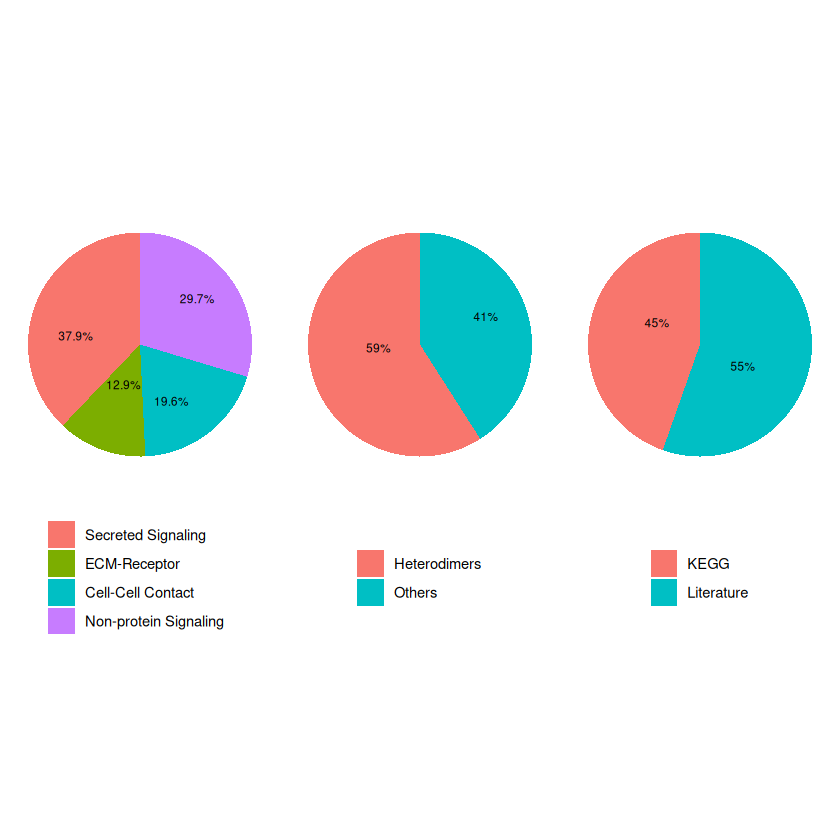

In [ ]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)

Pick the subset of the database that you actually want to use

In [ ]:

# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
# use all CellChatDB for cell-cell communication analysis
# CellChatDB.use <- CellChatDB # simply use the default CellChatDB

In [ ]:


cellchat_list <- lapply(names(ovVis_input), function(sample_name) {
  sample_data <- ovVis_input[[sample_name]]
  
  cellchat <- CellChat::createCellChat(
    object = sample_data$data,
    meta = sample_data$meta,
    group.by = "cell_type_collapsed",                 # adjust to the column name in meta for cell types
    coordinates = sample_data$spatial,
    datatype = "spatial",
    #scale.factors = sample_data$scale.factors,
    spatial.factors = data.frame(ratio = 1, tol = 32.5),  # adjust tol if needed
    do.sparse=TRUE
  )
  
  # Set CellChat database (optional: replace with the specific database you want to use)
  cellchat@DB <- CellChatDB.mouse  # or CellChatDB.use if you loaded a custom DB
  
  return(cellchat)
})

names(cellchat_list) <- names(ovVis_input)



[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 


In [ ]:
cellchat <- cellchat_list[[1]]
levels(cellchat@idents)
groupSize <- as.numeric(table(cellchat@idents)) # cells per type
groupSize
slotNames(cellchat) #data.raw is only populated if you provide the raw counts which aren't actually required by cellchat



[1] "B naive activated" "B naive resting"   "CD4"              
 [4] "CD8"               "Dendritic Cells"   "Endothelial"      
 [7] "Macrophage"        "Mesenchymal"       "Monocytes"        
[10] "Neutrophils"       "NK_cell"           "Plasma Cells"     
[13] "T-helper"          "Treg"              "Tumour"

[1]  157   42  212  127  134  311 1095   84  144   19  176  197   48   69 6461

[1] "data.raw"       "data"           "data.signaling" "data.scale"    
 [5] "data.smooth"    "images"         "net"            "netP"          
 [9] "meta"           "idents"         "DB"             "LR"            
[13] "var.features"   "dr"             "options"

In [ ]:

library(presto)

# Subset data to relevant genes and ligand-receptor pairs
cellchat <- subsetData(cellchat)

In [ ]:
cellchat@spatial


In [ ]:

cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat, raw.use = FALSE)
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)


The number of highly variable ligand-receptor pairs used for signaling inference is 1255 
triMean is used for calculating the average gene expression per cell group. 


Warning message in max(data):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): no rows to aggregate
